In [1]:
import random_walker as rw
import utils
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from networkx.drawing.nx_agraph import graphviz_layout
from networkx.algorithms.operators.binary import union
from networkx.utils.misc import generate_unique_node
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 60}

mpl.rc('font', **font)

/home/k1801311/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/k1801311/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


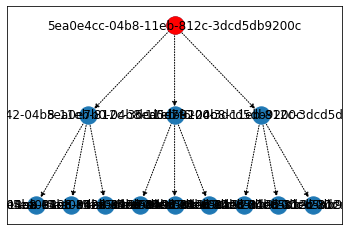

In [2]:
#Create a regular tree with set offspring factor and height above the root, with edges directed away from root.
offspring_factor=3
height=2
H,root=utils.balanced_directed_tree(offspring_factor, height)
label_dict={node:generate_unique_node() for node in H} 
nx.relabel_nodes(H,label_dict,copy=False)
root=label_dict[root]
pos=graphviz_layout(H,prog='dot')
collection=nx.draw_networkx_edges(H,pos)
for patch in collection:
    patch.set_linestyle('dotted')
nx.draw_networkx_nodes(H,pos)
nx.draw_networkx_labels(H,pos)
nx.draw_networkx_nodes(H,pos,nodelist=[root],node_color='r',labels=True)
plt.show()

In [3]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 60}

mpl.rc('font', **font)

/home/k1801311/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
/home/k1801311/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:595: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):


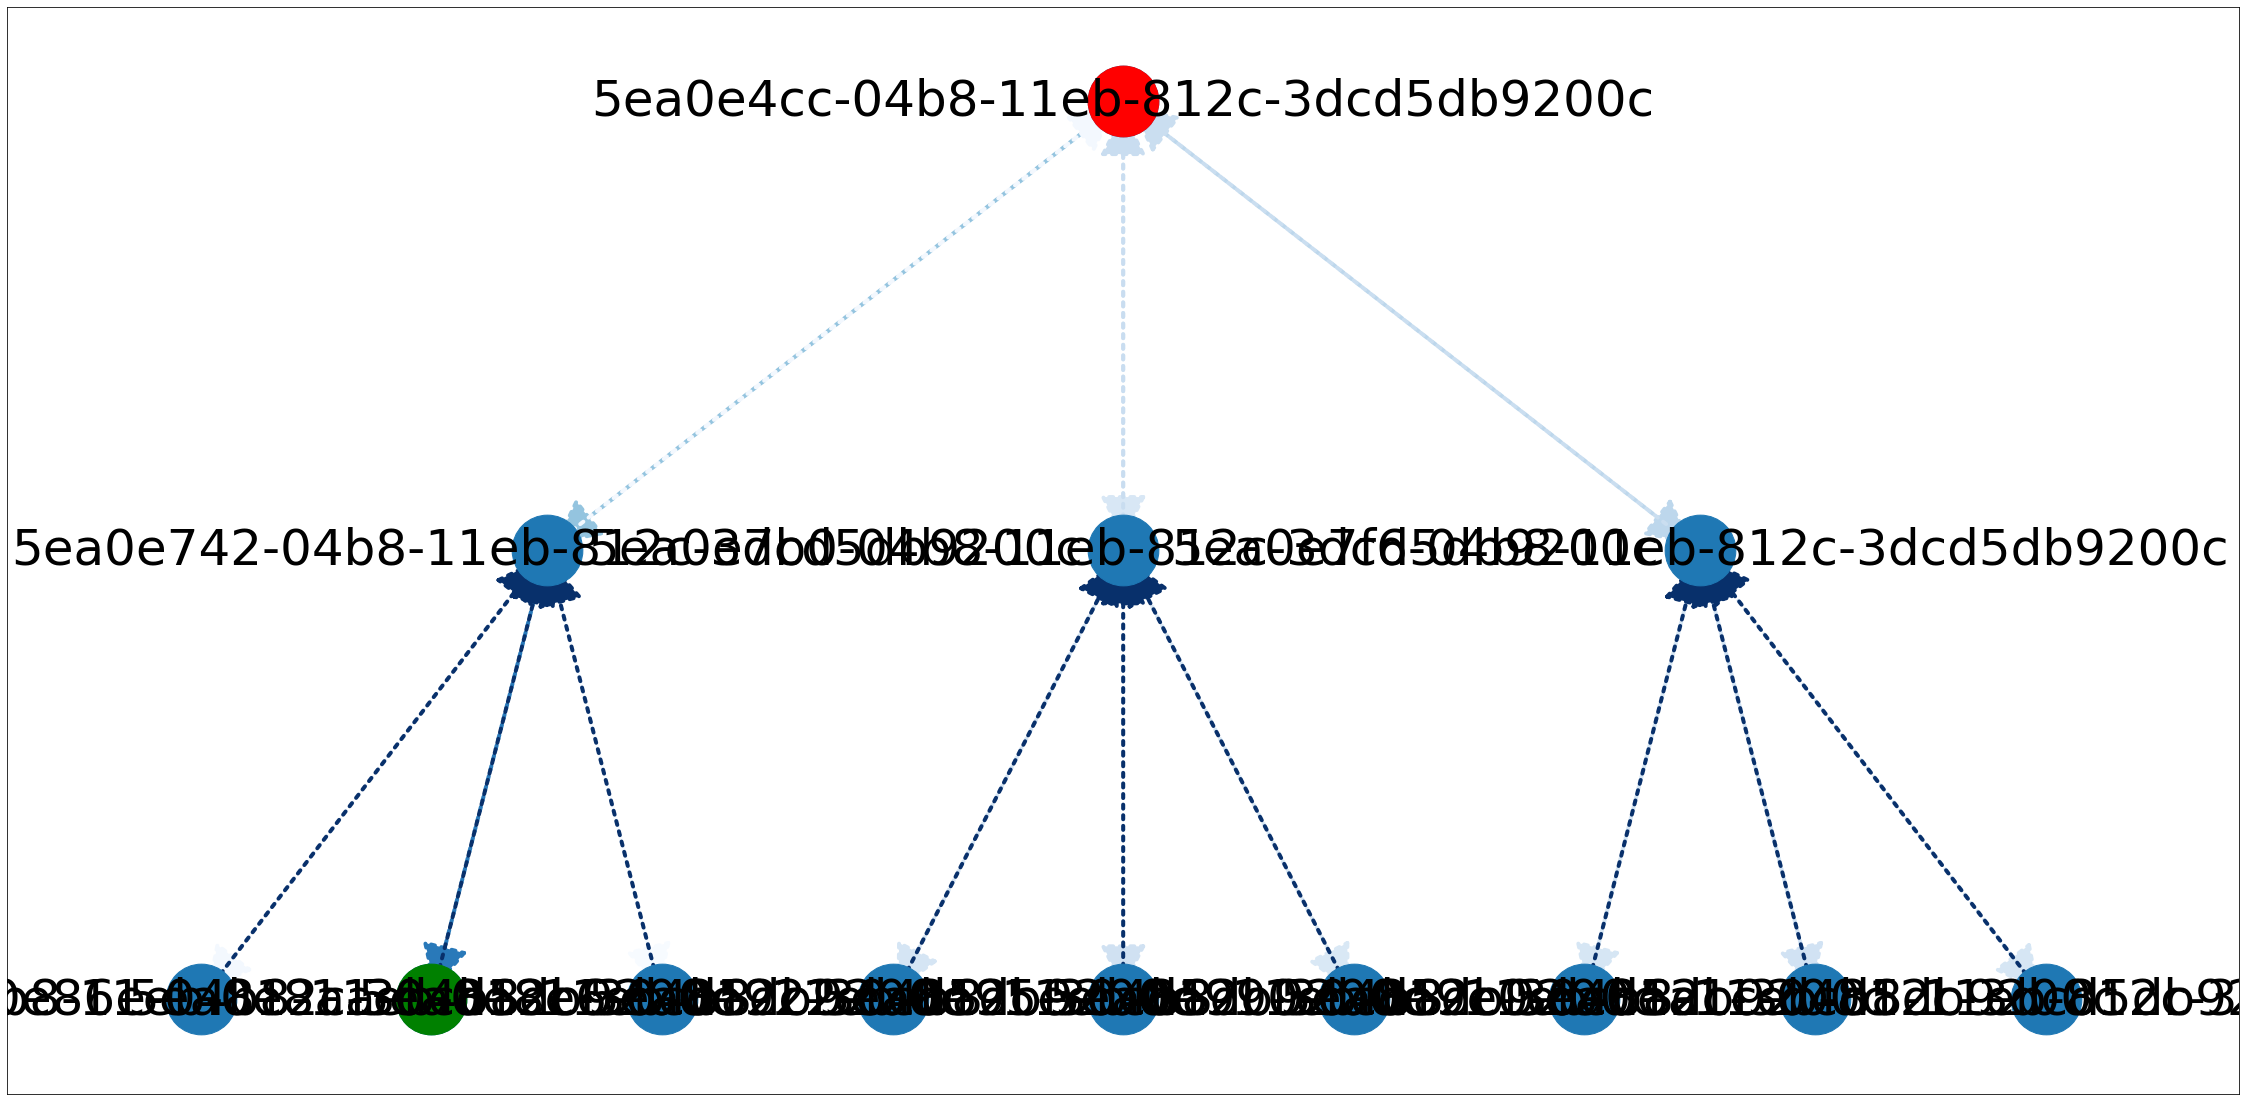

In [4]:
np.random.seed(100)
#Create patternWalker based on the above tree.
pattern_len=15 #String/pattern length
flip_rate=5/pattern_len #Bit flipping rate for propagating patterns
G_base=rw.patternWalker(H,root,pattern_len,flip_rate)
G_base.set_weights()
#pos=graphviz_layout(G,prog='dot') #Positions can be taken from H
(edges_base,weights_base) = zip(*nx.get_edge_attributes(G_base,'weight').items())
plt.figure(figsize=(40,20))
edge_collection=nx.draw_networkx_edges(G_base, pos, edgelist=edges_base, edge_color=weights_base, arrowsize=100,width=4.0, edge_cmap=plt.cm.Blues)
for patch in edge_collection:
    patch.set_linestyle('dotted')

nx.draw_networkx_nodes(G_base, pos, node_size=5000)

nx.draw_networkx_labels(H,pos,font_size=50)
nx.draw_networkx_nodes(G_base,pos,nodelist=[root],node_color='r',node_size=5000.)
#Mark target node in green.
nx.draw_networkx_nodes(G_base,pos,nodelist=[G_base.target_node],node_color='g',node_size=5000)
#plt.savefig('./outputs/demonstrations/tree.png')
plt.show()

{'5f4cc53a-04b8-11eb-812c-3dcd5db9200c': Text(658.94, 162.0, '5f4cc53a-04b8-11eb-812c-3dcd5db9200c'),
 '5f4cc850-04b8-11eb-812c-3dcd5db9200c': Text(491.94, 90.0, '5f4cc850-04b8-11eb-812c-3dcd5db9200c'),
 '5f4cc90e-04b8-11eb-812c-3dcd5db9200c': Text(826.94, 90.0, '5f4cc90e-04b8-11eb-812c-3dcd5db9200c'),
 '5f4cca30-04b8-11eb-812c-3dcd5db9200c': Text(157.94, 18.0, '5f4cca30-04b8-11eb-812c-3dcd5db9200c'),
 '5f4ccab2-04b8-11eb-812c-3dcd5db9200c': Text(491.94, 18.0, '5f4ccab2-04b8-11eb-812c-3dcd5db9200c'),
 '5f4ccb98-04b8-11eb-812c-3dcd5db9200c': Text(826.94, 18.0, '5f4ccb98-04b8-11eb-812c-3dcd5db9200c'),
 '5f4ccc10-04b8-11eb-812c-3dcd5db9200c': Text(1161.9, 18.0, '5f4ccc10-04b8-11eb-812c-3dcd5db9200c')}

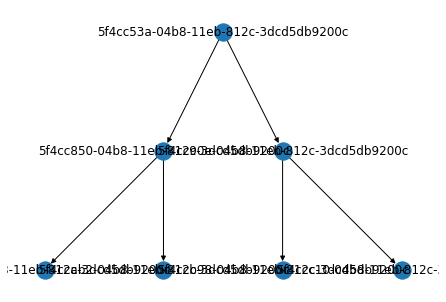

In [5]:
np.random.seed(15)
appendix,app_root=utils.poisson_ditree(lam=2.5,n_max=6)
app_target=np.random.choice(utils.leaves(appendix))
pos=graphviz_layout(appendix,prog='dot')
nx.draw(appendix,pos)
nx.draw_networkx_labels(appendix,pos)

In [6]:
G_temp=union(G_base.hierarchy_backup,appendix)
G_temp=nx.contracted_nodes(G_temp,G_base.target_node,app_root)
G_new=rw.patternWalker(G_temp,G_base.root,pattern_len,flip_rate,search_for=app_target)
G_new.set_weights()

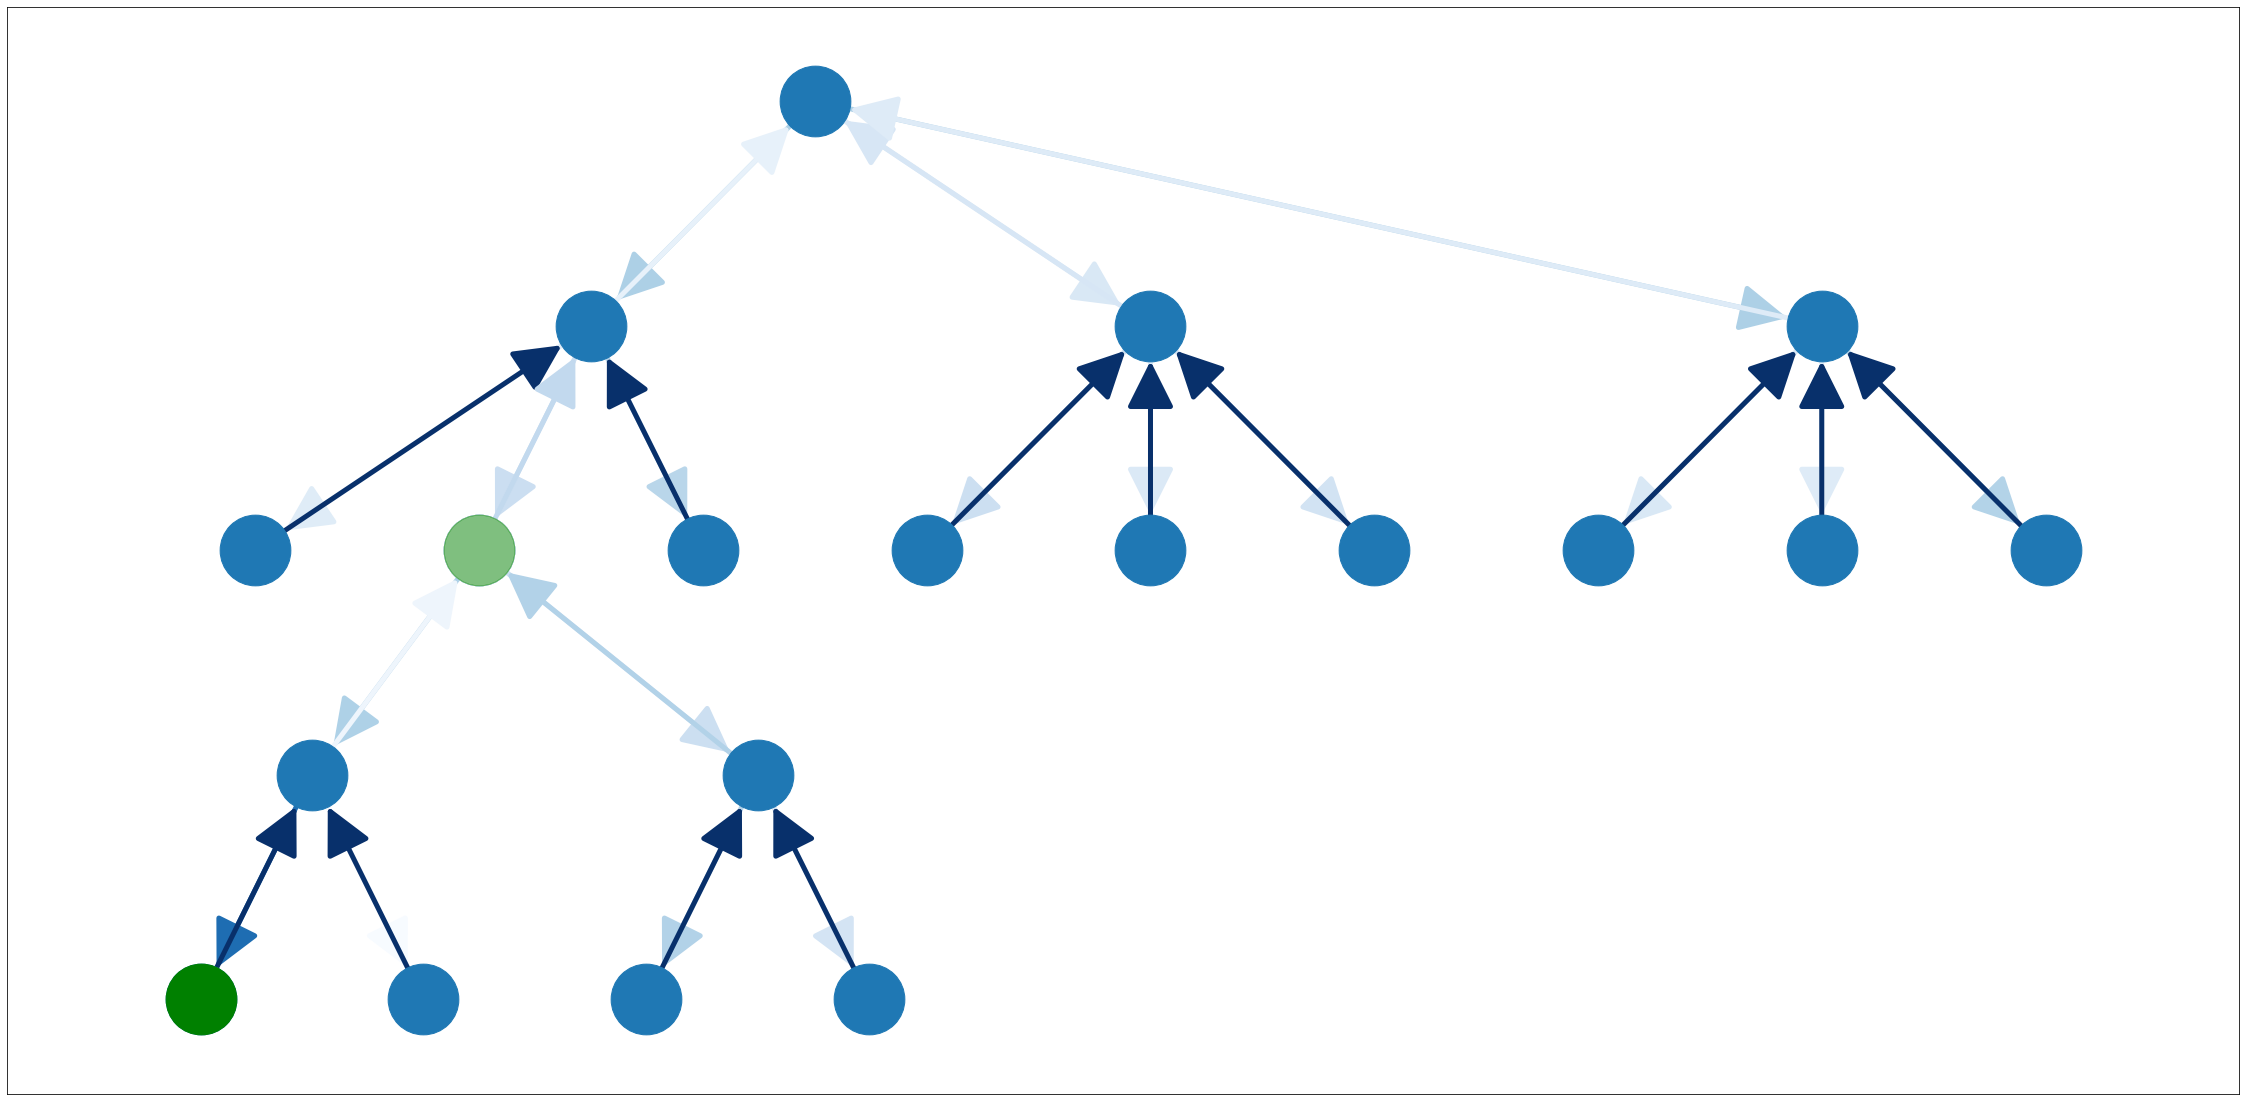

In [7]:
pos=graphviz_layout(G_new,prog='dot') 
(edges_new,weights_new) = zip(*nx.get_edge_attributes(G_new,'weight').items())
plt.figure(figsize=(40,20))
nx.draw_networkx_edges(G_new, pos, edgelist=edges_new, edge_color=weights_new, node_size=5000,arrowsize=100,width=5.0, edge_cmap=plt.cm.Blues)
nx.draw_networkx_nodes(G_new, pos, node_size=5000)
#nx.draw_networkx_labels(G_new,pos,font_size=50)
#nx.draw_networkx_nodes(G_new,pos,nodelist=[root],node_color='r',node_size=5000.)
#Mark target node in green.
nx.draw_networkx_nodes(G_new,pos,nodelist=[G_new.target_node],node_color='g',node_size=5000)
nx.draw_networkx_nodes(G_new,pos,nodelist=[G_base.target_node],node_color='w', alpha=1, node_size=5000)
nx.draw_networkx_nodes(G_new,pos,nodelist=[G_base.target_node],node_color='g', alpha=0.5, node_size=5000)
#plt.savefig('./outputs/demonstrations/tree.png')
plt.show()


In [8]:
crosslinks=list( zip( np.random.choice(G_new.nodes,6),np.random.choice(G_new.nodes,6) ) )
G_new.add_edges_from(crosslinks)
G_new.set_weights()

In [9]:
#(base_edges,base_weights)=zip(*nx.get_edge_attributes(G_new.subgraph(G.nodes),'weight').items())
base_edges=list(G_base.edges())
base_weights=[G_new.edges[x]['weight'] for x in base_edges]

nx.relabel_nodes(appendix, {app_root:G_base.target_node}, copy=False)

app_edges=list(appendix.edges())
app_edges=app_edges+[ (v,u) for (u,v) in app_edges ]
app_weights=[G_new.edges[x]['weight'] for x in app_edges]

crosslinks_weights=[G_new.edges[x]['weight'] for x in crosslinks]

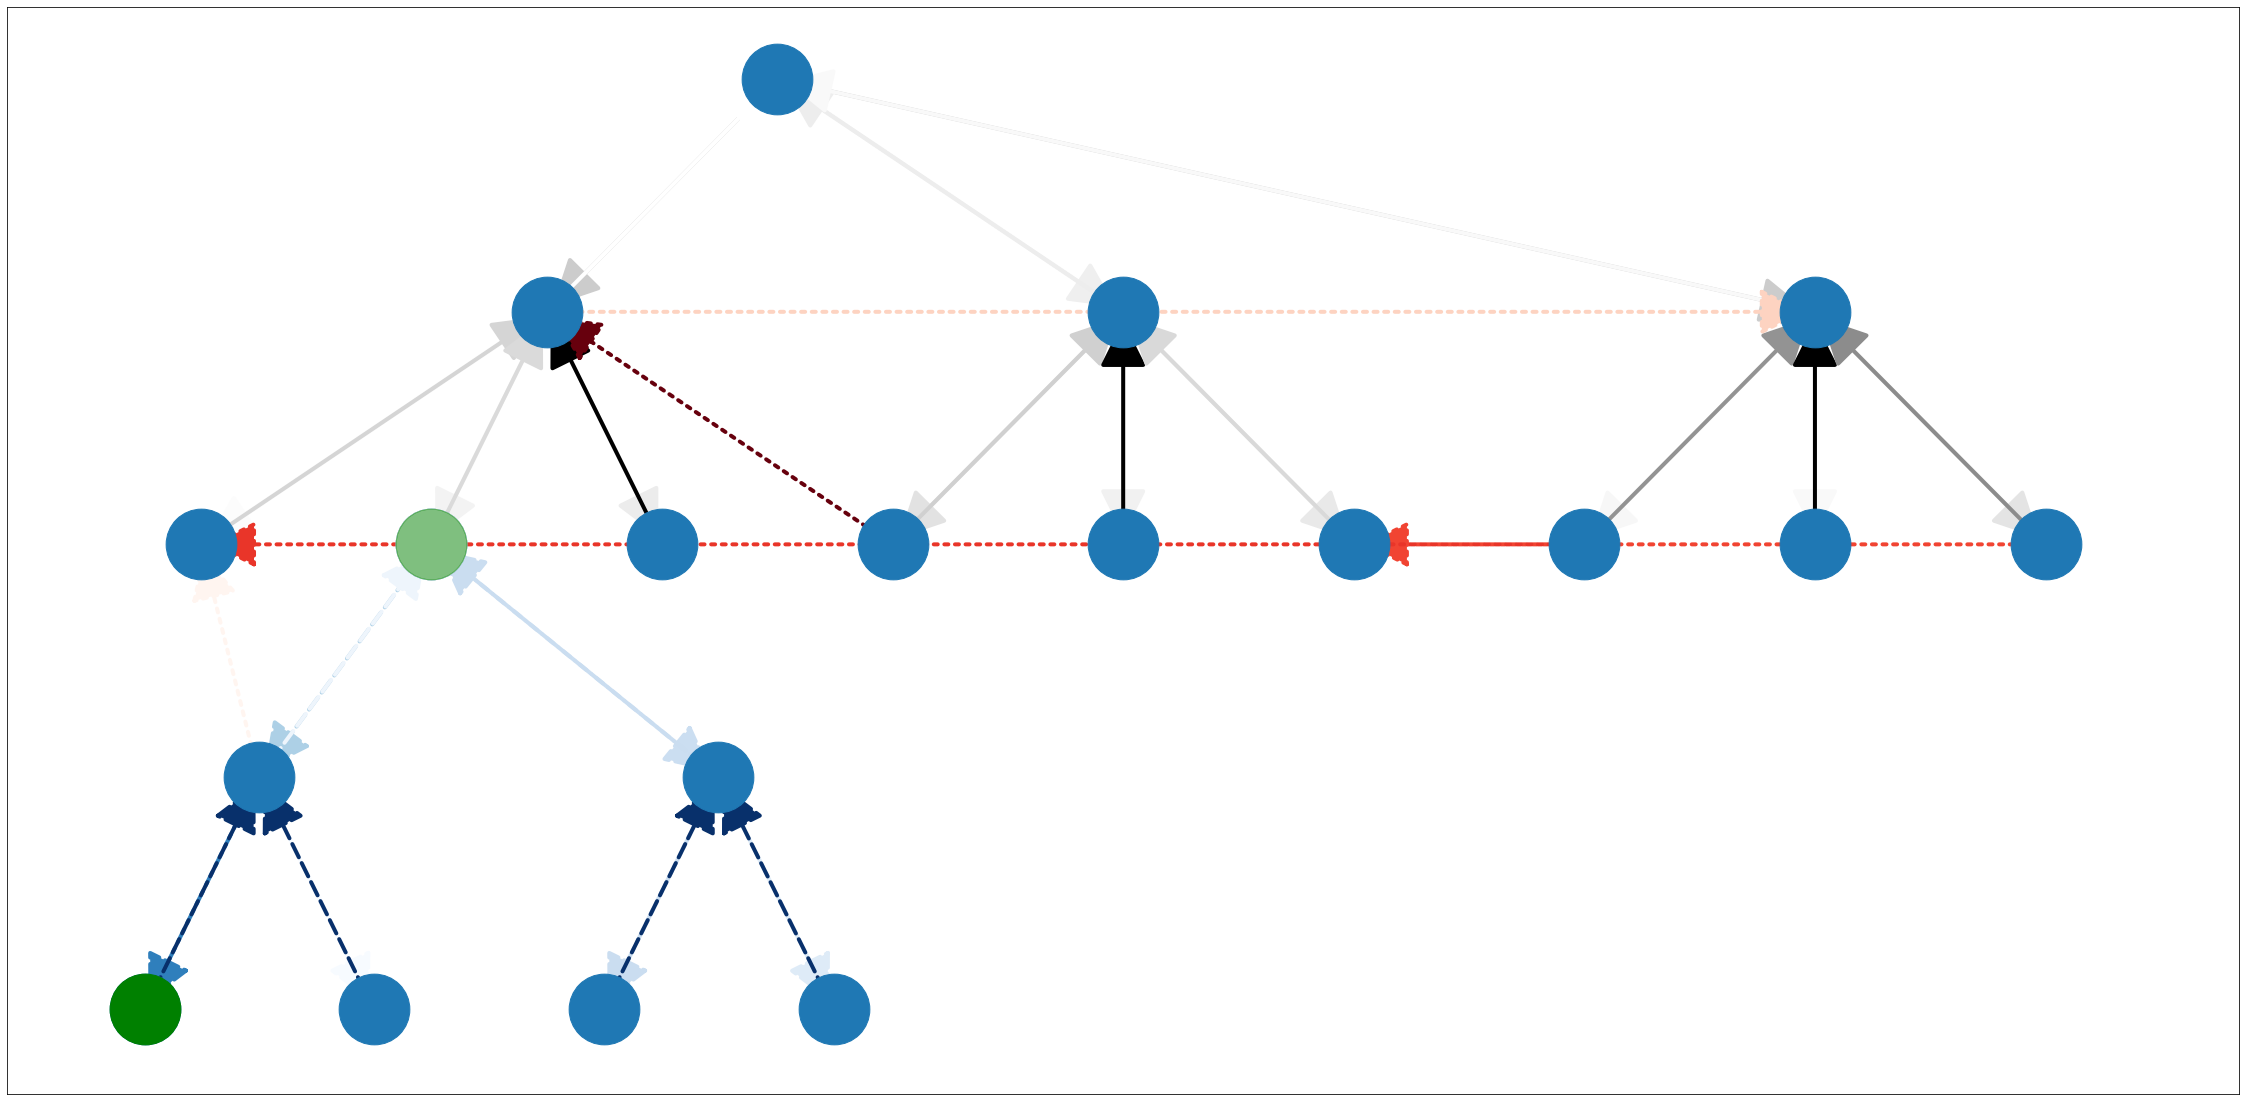

In [10]:
(edges,weights) = zip(*nx.get_edge_attributes(G_new,'weight').items())
plt.figure(figsize=(40,20))

nx.draw_networkx_nodes(G_new, pos, node_size=5000)

base_collection=nx.draw_networkx_edges(G_new, pos, edgelist=base_edges, edge_color=base_weights,arrowsize=100,width=4.0, edge_cmap=plt.cm.Greys)
for patch in base_collection:
    patch.set_linestyle('solid')

app_collection=nx.draw_networkx_edges(G_new, pos, edgelist=app_edges, edge_color=app_weights, arrowsize=100,width=4.0, edge_cmap=plt.cm.Blues)
for patch in app_collection:
    patch.set_linestyle('dashed')

cross_collection=nx.draw_networkx_edges(G_new, pos, edgelist=crosslinks, edge_color=crosslinks_weights,arrowsize=100,width=4.0, edge_cmap=plt.cm.Reds)
for patch in cross_collection:
    patch.set_linestyle('dotted')

#nx.draw_networkx_labels(G_new,pos,font_size=50)
#nx.draw_networkx_nodes(G_new,pos,nodelist=[root],node_color='r',node_size=5000.)
#Mark target node in green.
nx.draw_networkx_nodes(G_new,pos,nodelist=[G_new.target_node],node_color='g',node_size=5000)
nx.draw_networkx_nodes(G_new,pos,nodelist=[G_base.target_node],node_color='w', alpha=1, node_size=5000)
nx.draw_networkx_nodes(G_new,pos,nodelist=[G_base.target_node],node_color='g', alpha=0.5, node_size=5000)
#plt.savefig('./outputs/demonstrations/multistage_tree.png')
plt.show()


In [11]:
#Same with scaled edge thickness?

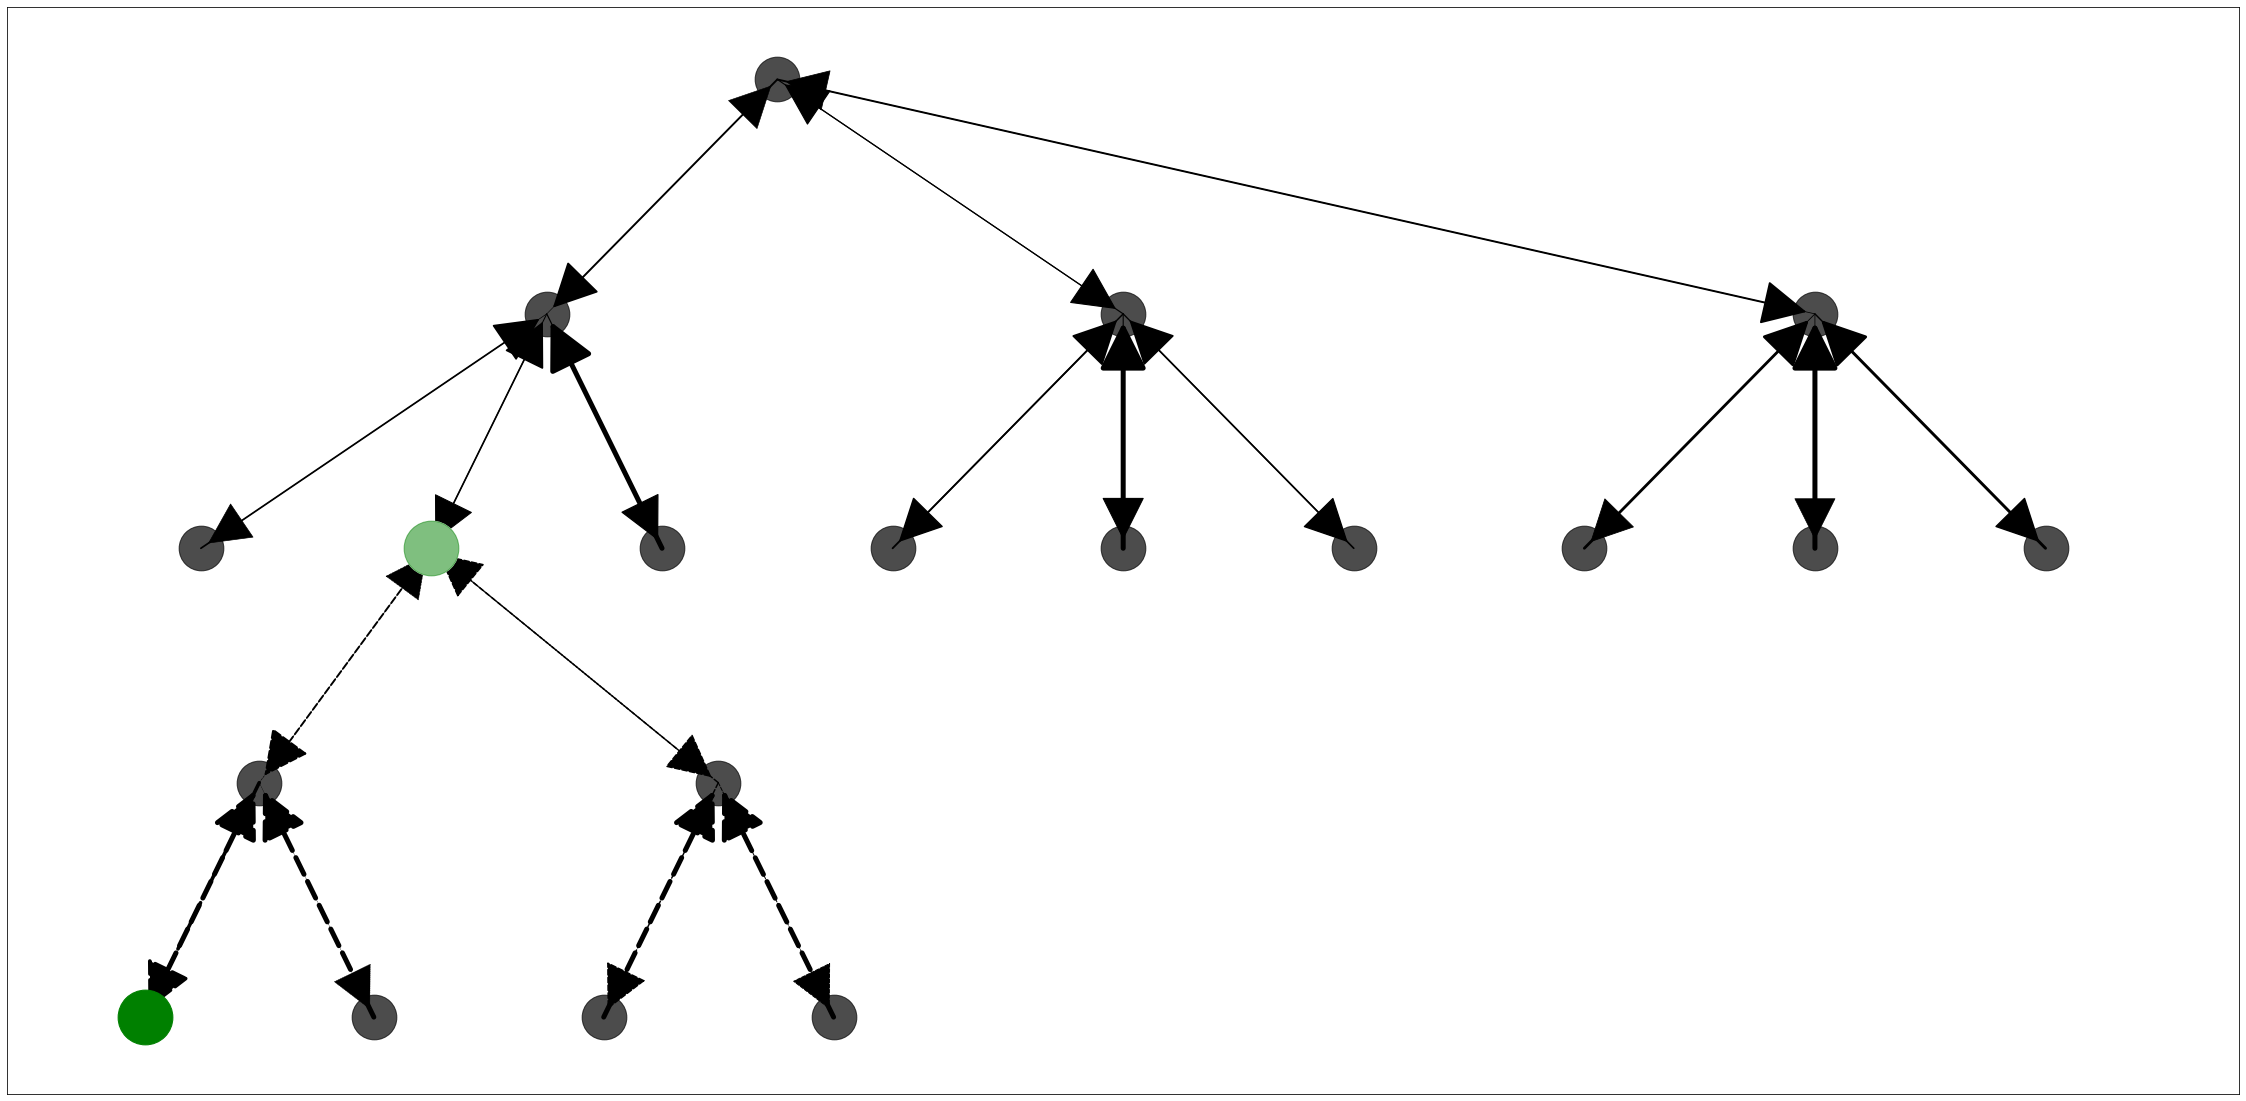

In [16]:
(edges,weights) = zip(*nx.get_edge_attributes(G_new,'weight').items())
plt.figure(figsize=(40,20))

nx.draw_networkx_nodes(G_new, pos, node_size=2000, node_color='k',alpha=0.7)

base_collection=nx.draw_networkx_edges(G_new, pos, edgelist=base_edges, edge_color='k',arrowsize=100,width=[5*x for x in base_weights])#, edge_cmap=plt.cm.Greys)
for patch in base_collection:
    patch.set_linestyle('solid')

app_collection=nx.draw_networkx_edges(G_new, pos, edgelist=app_edges, edge_color='k', arrowsize=100,width=[5*x for x in app_weights])#, edge_cmap=plt.cm.Blues)
for patch in app_collection:
    patch.set_linestyle('dashed')

#cross_collection=nx.draw_networkx_edges(G_new, pos, edgelist=crosslinks, edge_color='red',arrowsize=100,width=[5*x for x in crosslinks_weights])#, edge_cmap=plt.cm.Reds)
#for patch in cross_collection:
#    patch.set_linestyle('dotted')

#nx.draw_networkx_labels(G_new,pos,font_size=50)
#nx.draw_networkx_nodes(G_new,pos,nodelist=[root],node_color='r',node_size=5000.)
#Mark target node in green.
nx.draw_networkx_nodes(G_new,pos,nodelist=[G_new.target_node],node_color='g',node_size=3000)
nx.draw_networkx_nodes(G_new,pos,nodelist=[G_base.target_node],node_color='w', alpha=1, node_size=3000)
nx.draw_networkx_nodes(G_new,pos,nodelist=[G_base.target_node],node_color='g', alpha=0.5, node_size=3000)
plt.savefig('./outputs/demonstrations/multistage_tree.png')
plt.show()
